In [1]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

import numpy as np 
import os
import pandas as pd
# import tensorflow as tf

import torch

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import scipy.stats as stats
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Sehwan Yoo\AppData\Local\Programs\Python\Python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to C:\Users\Sehwan
[nltk_data]     Yoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sehwan
[nltk_data]     Yoo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sehwan
[nltk_data]     Yoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
PATH = './dataset/'
# PATH = 'd:/Github/meaning_map/'
# PATH = '/Users/macair/Dropbox/4. Project/paper/'
# PATH = 'D:/Dropbox/2. WORK/(202104) research/620221/dataset/'
# PATH = '/content/drive/MyDrive/data/csv/'

In [4]:
# df = pd.DataFrame()
# data = []
li = []

for i in range(10):
    data = pd.read_csv(PATH + 'scopus(' + str(i) + ').csv', error_bad_lines=False)
    # data = pd.read_csv(PATH + 'dataset/scopus(' + str(i) + ').csv')
    li.append(data)

    # for idx, val in df.iterrows():

    #     for vv in val['Abstract'].split('.'):
    #         data.append(vv)
    
df = pd.concat(li, axis=0, ignore_index=True)
print(df.shape) 

(13226, 31)


b'Skipping line 504: expected 31 fields, saw 32\n'
b'Skipping line 507: expected 31 fields, saw 32\n'


In [5]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

lst_stopwords = nltk.corpus.stopwords.words("english")
# lst_stopwords


df["clean_abst"] = df["Abstract"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

corpus = [] 
for idx, val in df.iterrows():
  corpus.append(val['clean_abst'])

# corpus[:5]

In [5]:
# 단어 갯수 
before_cnt = 0 
after_cnt = 0 
for i, v in df.iterrows():
  # return 0 

  for a in v['Abstract'].split(' '):
    before_cnt += 1 

  for c in v['clean_abst'].split(' '):
    after_cnt += 1 


print('Before :' + str(before_cnt))
print('After : ' + str(after_cnt)) 

Before :2321561
After : 1432864


In [ ]:
########## Evaluation Begin

In [ ]:
# create temp file and save converted embedding into it
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

target_file = get_tmpfile('word2vec.6B.300d.txt')
glove2word2vec(PATH + 'glove.6B.300d.txt', target_file)

# load the converted embedding into memory
glove_vectors = KeyedVectors.load_word2vec_format(target_file)

In [103]:
import re
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = df.clean_abst.values.tolist()
data_words = list(sent_to_words(data))
# print(data_words[:1][0][:30])


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_unigram(texts):
# data_wrods_unigram = []
# for cc in df['clean_abst']:
  # data_words = []
  # for c in cc.split(' '):
    # data_words.append(c) 
    return [x for x in texts.split(' ')]

#   data_wrods_unigram.append(data_words)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
    
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
# data_words_unigram = make_unigram(data_words_nostops)
# data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# data_lemmatized = lemmatization(data_wrods_unigram, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


# print(data_lemmatized[:1])

import gensim.corpora as corpora
from gensim.models import CoherenceModel, TfidfModel

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print('corpus : ' + corpus)

tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

model1 = gensim.models.LsiModel(corpus=corpus_tfidf, id2word=id2word, num_topics=10)
# model1 = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=id2word, num_topics=10)


model2 = gensim.models.LsiModel(corpus=corpus, id2word=id2word, num_topics=10)
# model2 = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10)



# Compute Coherence Score

coherence_model_lda1 = CoherenceModel(model=model1, texts=data_lemmatized, dictionary=id2word, coherence='c_v', keyed_vectors=glove_vectors)
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


coherence_model_lda2 = CoherenceModel(model=model2, texts=data_lemmatized, dictionary=id2word, coherence='c_v', keyed_vectors=glove_vectors)
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='c_v', keyed_vectors=keyed_vectors)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.3987007327106526


In [ ]:
####### Evaluation End

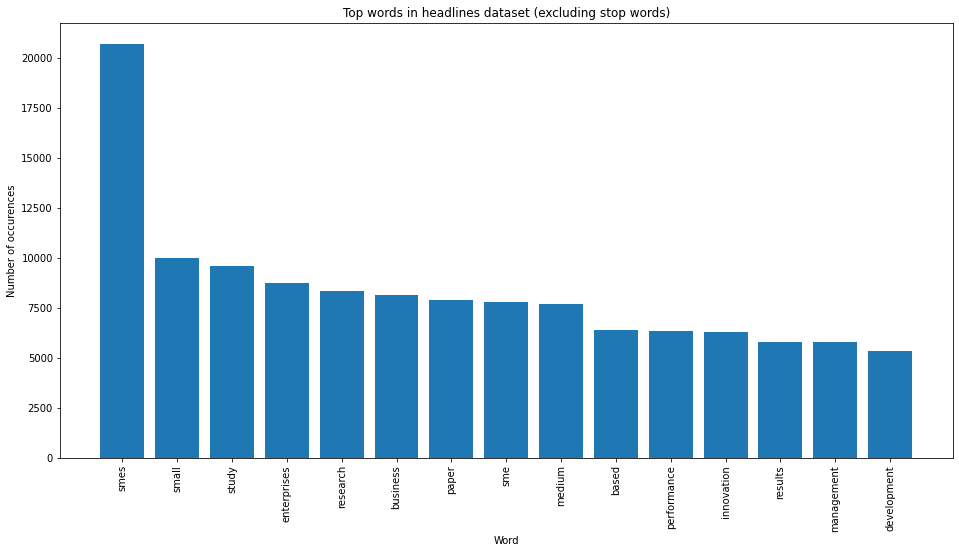

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['Abstract'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# Word Representation

1. TFIDF (Term Frequncy Inverse Document Frequncy) 
2. Bag of words

this approach causes a significant dimensionality problem


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'research': 41748, 'paper': 36236, 'evaluate': 19031, 'present': 38860, 'result': 41954, 'online': 35156, 'survey': 47471, 'conducted': 12546, 'various': 51442, 'indian': 25152, 'manufacturing': 29908, 'small': 45075, 'medium': 30529, 'enterprise': 18275, 'smes': 45269, 'mainly': 29684, 'focus': 20768, 'critical': 13723, 'success': 47141, 'factor': 19650, 'csfs': 13948, 'implementing': 24855, 'six': 44895, 'sigma': 44598, 'identified': 24464, 'crucial': 13866, 'implementation': 24846, 'sector': 43597, 'india': 25151, 'based': 7946, 'questionnaire': 40368, 'apposite': 6495, 'investigation': 26374, 'study': 46864, 'analysis': 5990, 'descriptive': 15288, 'statistic': 46434, 'investigated': 26371, 'reveal': 42065, 'impact': 24796, 'different': 15733, 'tjprc': 49129, 'pvt': 40068, 'ltd': 29335, 'according': 4605, 'application': 6472, 'r

Text(33.0, 0.5, 'Number of ')

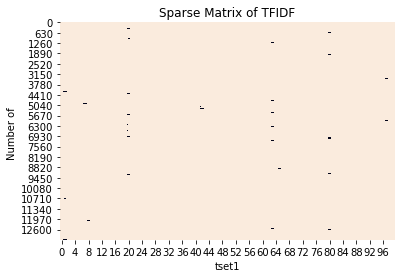

In [16]:
# TFIDF (희소표현)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)
sns_tfidfv = tfidfv.transform(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)
sns_tfidfv.todense()
sns.heatmap(sns_tfidfv.todense()[:,np.random.randint(0,sns_tfidfv.shape[1],100)]==0, 
            vmin=0, 
            vmax=1, 
            cbar=False).set_title('Sparse Matrix of TFIDF')

plt.xlabel('tset1')
plt.ylabel('Number of ')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'research': 7450, 'paper': 6258, 'evaluate': 3100, 'present': 6734, 'result': 7587, 'online': 6062, 'survey': 8987, 'conducted': 1733, 'various': 9729, 'indian': 4358, 'manufacturing': 5348, 'small': 8122, 'medium': 5513, 'enterprise': 2930, 'smes': 8200, 'mainly': 5248, 'focus': 3614, 'critical': 2034, 'success': 8888, 'factor': 3329, 'csfs': 2072, 'implementing': 4241, 'six': 8088, 'sigma': 8022, 'identified': 4167, 'crucial': 2060, 'implementation': 4232, 'sector': 7846, 'india': 4356, 'based': 955, 'questionnaire': 7135, 'investigation': 4750, 'study': 8745, 'analysis': 611, 'descriptive': 2301, 'statistic': 8633, 'investigated': 4741, 'reveal': 7635, 'impact': 4210, 'different': 2429, 'pvt': 7084, 'ltd': 5208, 'research paper': 7503, 'paper evaluate': 6287, 'present result': 6746, 'online survey': 6063, 'survey conducted': 8990, 'indian manufacturing': 4359, 'ma

Text(0.5, 1.0, 'Sparse Matrix of BOW')

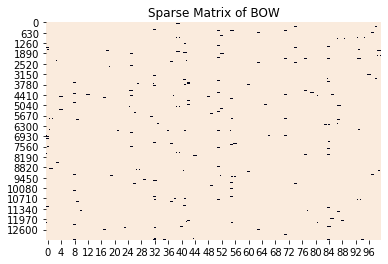

In [17]:
# Bag of words (희소표현)
import seaborn as sns

vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
bag = vectorizer.fit(corpus)
txt_bag = vectorizer.transform(corpus) 
print(vectorizer.transform(corpus).toarray())
print(vectorizer.vocabulary_) 

# Visualization
# sns.heatmap(txt_bag.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')
sns.heatmap(txt_bag.todense()[:,np.random.randint(0,txt_bag.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix of BOW')

# Topic Modeling

1. LSA 
2. LDA 

2. Word Embedding

3. Glove 
4. Fasttext 

In [ ]:
'''
########################### 사용안함
'''
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


text = df[['clean_abst']]
# print(text)
text['token_abst'] = text.apply(lambda row: nltk.word_tokenize(row['clean_abst']), axis=1)
# print(df['token_abst'])
stop = stopwords.words('english')

text['token_abst'] = text['token_abst'].apply(lambda x: [word for word in x if word not in (stop)])
text['token_abst'] = text['token_abst'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
tokenized_doc = text['token_abst'].apply(lambda x: [word for word in x if len(word) > 3])

# TF-IDF 
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['token_abst'] = detokenized_doc # 다시 text['headline_text']에 재저장

# terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [9]:
import gensim
model = gensim.models.Word2Vec.load_word2vec_format('path-to-vectors.txt', binary=False)
# if you vector file is in binary format, change to binary=True
sentence = ["London", "is", "the", "capital", "of", "Great", "Britain"]
vectors = [model[w] for w in sentence]

AttributeError: type object 'Word2Vec' has no attribute 'load_word2vec_format'

In [61]:
from collections import Counter

# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [59]:
################ LSA Begin

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

reindexed_df = df['clean_abst']

small_count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
small_text_sample = reindexed_df.sample(n=10000, random_state=0).values

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)
print('Shape of Matrix : ', small_document_term_matrix.shape)


n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

    


Shape of Matrix :  (10000, 45364)
Topic 1:  smes study enterprise small research business paper result sme performance
Topic 2:  complex sme temperature shape reaction phase alloy memory ligand transformation
Topic 3:  firm innovation performance study effect small relationship smes result activity
Topic 4:  innovation smes process open research new paper knowledge company product
Topic 5:  business small enterprise development family mediumsized research economic state support
Topic 6:  energy available abstract firm power storage superconducting smes paper small
Topic 7:  enterprise management small knowledge manufacturing mediumsized cloud supply service chain
Topic 8:  model performance energy storage cloud effect result based sme analysis
Topic 9:  firm knowledge learning network technology management capability process legal business
Topic 10:  energy company management performance power storage control smes efficiency process


In [53]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from sklearn.manifold import TSNE
from collections import Counter

%matplotlib qt5

# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors


tsne_lsa_model = TSNE(n_components=2, perplexity=100, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)


colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

# top_3_words_lsa = get_top_n_words(3, lsa_keys, txt_bag, vectorizer)
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.020s...
[t-SNE] Computed neighbors for 10000 samples in 1.256s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.400600
[t-SNE] KL divergence after 2000 iterations: 0.606822


In [60]:
# %matplotlib inline
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]


fig, ax = plt.subplots(figsize=(8,10))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of AbStract');
ax.set_title('LSA topic counts');
plt.show()

In [75]:
#### LDA Begin
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation


reindexed_df = df['clean_abst']

small_count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
small_text_sample = reindexed_df.sample(n=10000, random_state=0).values

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)
print('Shape of Matrix : ', small_document_term_matrix.shape)


n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Shape of Matrix :  (10000, 561141)
Topic 1:  small medium small mediumsized enterprise smes mediumsized enterprise medium enterprise case study right reserved subject matter matter expert paper present
Topic 2:  energy storage magnetic energy superconducting magnetic storage smes energy efficiency small mediumsized enterprise smes mediumsized enterprise right reserved small medium
Topic 3:  small mediumsized mediumsized enterprise enterprise smes small medium family business right reserved medium enterprise family firm venture capital case study
Topic 4:  shape memory supply chain memory effect effect sme right reserved small medium small mediumsized elsevier bv xray diffraction mediumsized enterprise
Topic 5:  small mediumsized small medium abstract available enterprise smes mediumsized enterprise medium enterprise right reserved risk management case study big data
Topic 6:  small medium enterprise smes medium enterprise small mediumsized mediumsized enterprise right reserved medium s

In [73]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.069s...
[t-SNE] Computed neighbors for 10000 samples in 1.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.435371
[t-SNE] KL divergence after 2000 iterations: 0.893085


In [74]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(8,10))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of AbStract');

In [98]:
# LDA with TSIDF Begin

reindexed_df = df['clean_abst']


small_count_vectorizer = TfidfVectorizer(stop_words='english', lowercase=False)
small_text_sample = reindexed_df.sample(n=10000, random_state=0).values

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)
print('Shape of Matrix : ', small_document_term_matrix.shape)


n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])


Shape of Matrix :  (10000, 45364)


AttributeError: 'int' object has no attribute 'toarray'

In [93]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 0.829s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.530762
[t-SNE] KL divergence after 2000 iterations: 0.357260


In [94]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(8,10))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of AbStract');

In [ ]:
#### Words Above 

In [21]:
'''
########################### 사용안함
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


vectorizer = TfidfVectorizer()
TF_IDF_matrix = vectorizer.fit_transform(df['clean_abst'])
TF_IDF_matrix = TF_IDF_matrix.T

print('Vocabulary Size : ', len(vectorizer.get_feature_names()))
print('Shape of Matrix : ', TF_IDF_matrix.shape)


'''
import numpy as np

# Applying SVD
U, s, VT = np.linalg.svd(TF_IDF_matrix.toarray()) # .T is used to take transpose and .toarray() is used to convert sparse matrix to normal matrix

TF_IDF_matrix_reduced = np.dot(U[:,:K], np.dot(np.diag(s[:K]), VT[:K, :]))

# Getting document and term representation
terms_rep = np.dot(U[:,:K], np.diag(s[:K])) # M X K matrix where M = Vocabulary Size and N = Number of documents
docs_rep = np.dot(np.diag(s[:K]), VT[:K, :]).T # N x K matrix 


import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(docs_rep[:,0], docs_rep[:,1], c=datax['Recommended IND'])
plt.title("Document Representation")
plt.show()


plt.scatter(terms_rep[:,0], terms_rep[:,1])
plt.title("Term Representation")
plt.show()
'''

Vocabulary Size :  53699
Shape of Matrix :  (53699, 13226)


'\nimport numpy as np\n\n# Applying SVD\nU, s, VT = np.linalg.svd(TF_IDF_matrix.toarray()) # .T is used to take transpose and .toarray() is used to convert sparse matrix to normal matrix\n\nTF_IDF_matrix_reduced = np.dot(U[:,:K], np.dot(np.diag(s[:K]), VT[:K, :]))\n\n# Getting document and term representation\nterms_rep = np.dot(U[:,:K], np.diag(s[:K])) # M X K matrix where M = Vocabulary Size and N = Number of documents\ndocs_rep = np.dot(np.diag(s[:K]), VT[:K, :]).T # N x K matrix \n\n\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nplt.scatter(docs_rep[:,0], docs_rep[:,1], c=datax[\'Recommended IND\'])\nplt.title("Document Representation")\nplt.show()\n\n\nplt.scatter(terms_rep[:,0], terms_rep[:,1])\nplt.title("Term Representation")\nplt.show()\n'

In [14]:
'''
########################### 사용안함
'''
# n_topics = 8 
# lsa_model = TruncatedSVD(n_components=n_topics)
# lsa_topic_matrix = lsa_model.fit_transform(TF_IDF_matrix)

# lsa_keys = get_keys(lsa_topic_matrix)
# lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)


NameError: ignored

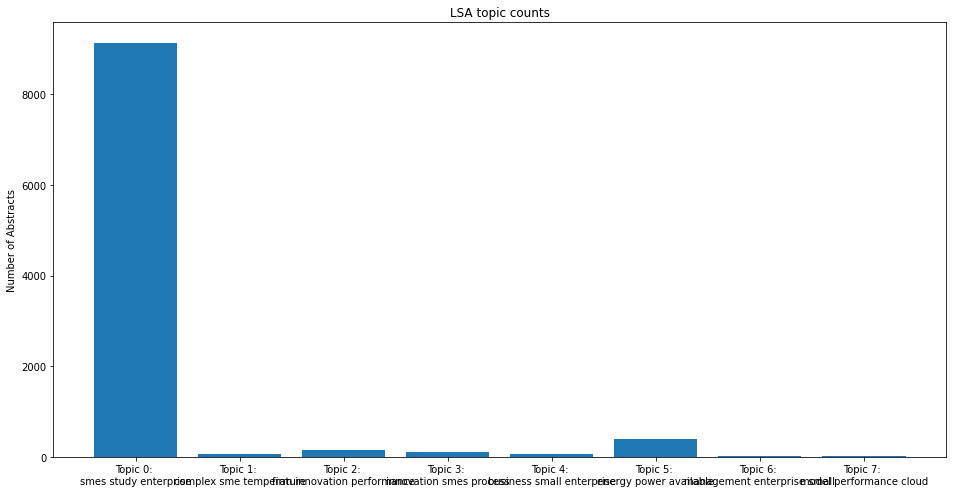

In [13]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Abstracts');
ax.set_title('LSA topic counts');
plt.show()

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
# from bokeh.io import output_notebook
# output_notebook()
from sklearn.manifold import TSNE

# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

tsne_lsa_model = TSNE(n_components=2, perplexity=100, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)


colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.012s...
[t-SNE] Computed neighbors for 10000 samples in 1.904s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.446198
[t-SNE] KL divergence after 2000 iterations: 1.679001


In [17]:

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
plt.show(plot)

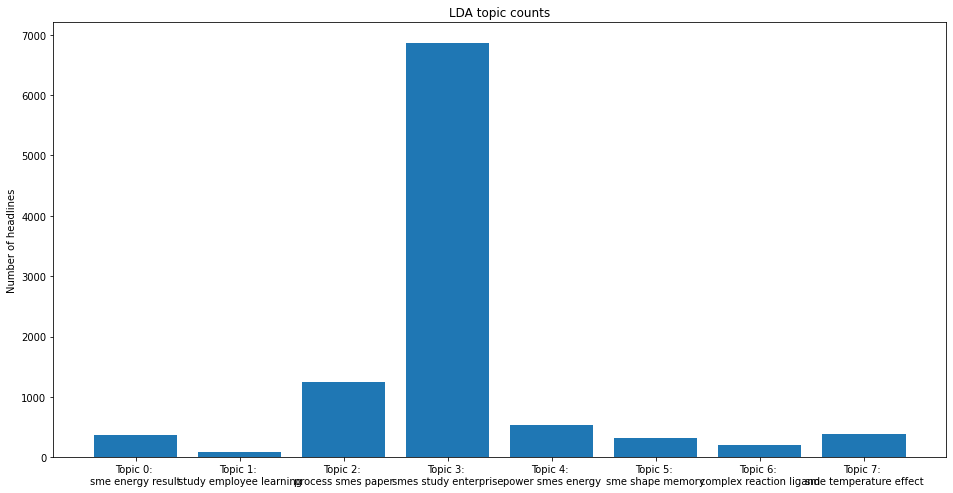

In [ ]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [ ]:
tsne_lda_model = TSNE(n_components=2, perplexity=5000, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

[t-SNE] Computing 9999 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 11.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.281740
[t-SNE] KL divergence after 50 iterations with early exaggeration: 33.274338
[t-SNE] KL divergence after 1250 iterations: 0.056225


In [ ]:
'''
########################### 사용안함
'''

In [ ]:
# Word Embedding (밀집표현) 
# from nltk.tokenize import word_tokenize, sent_tokenize

# # result = [word_tokenize(sentence) for sentence in normalized_text]
# # print(corpus[:10])
# result = []
# for c in corpus:
#   result.append(word_tokenize(c))

# # result[0]
# from gensim.models import Word2Vec
# model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

# model_result = model.wv.most_similar("business")
# print(model_result)
# !pip install LDA2Vec 

import LDA2Vec

n_words = 'test this is a test'

model = LDA2Vec(n_words, max_length, n_hidden, counts)
model.add_component(n_docs, n_topics, name='document id')
model.fit(clean, components=[doc_ids])




ModuleNotFoundError: ignored

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

tsnescatterplot(model, 'entrepreneurship', ['smes', 'business', 'firm', 'company', 'startup'])
    

ValueError: ignored

In [ ]:
# Glove 
from nltk.tokenize import word_tokenize, sent_tokenize
from glove import Glove, Corpus


result = [word_tokenize(sentence) for sentence in df['clean_abst']]
# print(result)


corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

model_result1=glove.most_similar("entrepreneurship")
print(model_result1)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
[('i4e2', 0.8940445960651904), ('firstperson', 0.7344185044984252), ('entrepreneurial', 0.6754635538013494), ('antibacterial', 0.6634812298100764)]


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('nls_model.h5')


In [ ]:
def sentence_generation(model, t, current_word, n): 
    init_word = current_word 
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

In [ ]:
print(sentence_generation(model, t, 'hi', 50))

hi containing evoked instrumentality sons evoked evoked evoked evoked evoked evoked evoked evoked evoked evoked evoked evoked evoked evoked cissebr2mesch2 evoked cissebr2mesch2 evoked evoked n8 orallyadministered potential evoked evoked evoked evoked evoked isnt isnt isnt isnt isnt 22thfn evoked fore wong potential potential bean evoked permeability evoked rpgs evoked borrowing evoked


In [ ]:
# --------------------- OLD VERSION ----------------------------- 

In [ ]:
train_text_X = []

for sentences in tokens_stemmed:

    for corpus in sentences:

        train_text_X.append(corpus)


# print(train_text_X)

# Creating NLS

vocab = sorted(list(set(train_text_X)))
vocab.append('UNK')

print('{} unique words'.format(len(vocab)))

word2idx = {u : i for i, u in enumerate(vocab)}
# print(word2idx)

idx2word = np.array(vocab)
# print(idx2word)

text_as_int = np.array([word2idx[c] for c in train_text_X])

print('------------------------------')
print(train_text_X[:20])
print(text_as_int[:20])



In [ ]:
# DATASET
seq_length = 25
examples_per_epoch = len(text_as_int)
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
# print(examples_per_epoch)
# print(sentence_dataset)
sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
# print(sentence_dataset)
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())


def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]


# print('--------------------------------------------------------------------')
train_dataset = sentence_dataset.map(split_input_target)
for x, y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())


In [ ]:
BATCH_SIZE = 128
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    
    if epoch % 5 != 0 and epoch != 49:
        return
    # test_sentence = tokens_stemmed[0]
    test_sentence = train_text_X[0]

    next_words = 100

    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx ['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
        output_idx = model.predict_classes(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]


    print()
    print(test_sentence)
    print()


testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)
history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)



In [ ]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''

    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장

    sentence = init_word + sentence
    return sentence

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
t = Tokenizer()

In [ ]:
print(sentence_generation(model, t, 'entrepreneurshup', 10))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


UnboundLocalError: local variable 'word' referenced before assignment

In [ ]:
#
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('nls_model.h5')

# print(model)